In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pickle

import matplotlib.pyplot as plt
import torch

from src.methods.mirror_prox import MirrorProx
from src.methods.paus import PAUS
from src.oracles.oracle import OperatorOracle
from src.utils.dataset import get_gaussian, load_mnist784, load_notMNIST_small
from src.utils.tm import get_1d_tm, get_2d_tm

In [ ]:
torch.manual_seed(30)

# MNIST 784

In [4]:
T = 10
n = T // 2

In [7]:
letters = load_notMNIST_small("B")[:T]

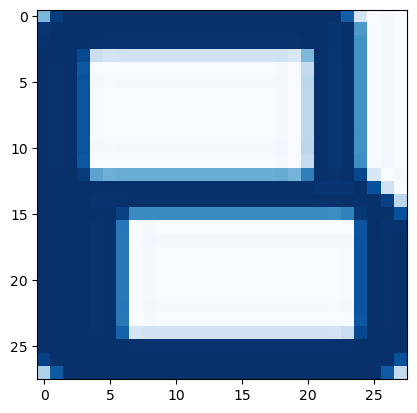

In [11]:
img = letters[0].reshape(28,28)

plt.imshow(img, cmap="Blues")

In [12]:
digits = load_mnist784(4)

/Users/michael/miniconda3/envs/PAUS/lib/python3.12/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


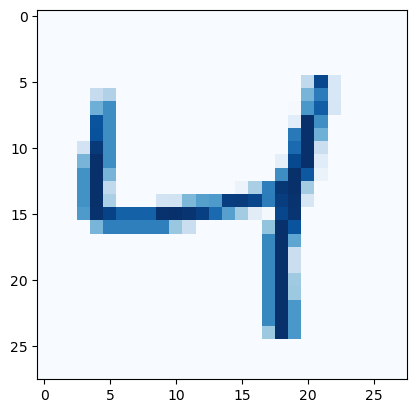

In [13]:
img = digits[0].reshape(28,28)

plt.imshow(img, cmap="Blues")

In [175]:
import ot
from src.utils.dataset import load_mnist64

In [176]:
images = load_mnist64(4)
d = 8

In [191]:
def get_method_images(images: torch.Tensor, n: int, d: int) -> tuple[OperatorOracle, OperatorOracle, torch.Tensor]:
    C = get_2d_tm(d)
    bar_true = ot.barycenter(images.T, C, 0.01)
    F, F1 = OperatorOracle(C, images, n, True), OperatorOracle(C, images, n, False)
    
    return F, F1, bar_true

# Gaussian

In [112]:
def get_method_gaussians(d: int, T: int, n: int) -> tuple[OperatorOracle, OperatorOracle, torch.Tensor]:
    C = get_1d_tm(d)
    histograms, bar_true = get_gaussian(d, T)
    F, F1 = OperatorOracle(C, histograms, n, True), OperatorOracle(C, histograms, n, False)
    
    return F, F1, bar_true

In [164]:
d = 64
T = 100
n = T // 2
L = 2
max_iter = 1000
step_scale = 1.0

In [165]:
F, F1, bar_true = get_method_gaussians(d, T, n)

In [53]:
with open(f"reports/oracles/F_d={d}_T={T}_n={n}.pkl", "wb") as f:
    pickle.dump(F, f)
with open(f"reports/oracles/F1_d={d}_T={T}_n={n}.pkl", "wb") as f:
    pickle.dump(F1, f)
with open(f"reports/oracles/bar_true_d={d}_T={T}_n={n}.pkl", "wb") as f:
    pickle.dump(bar_true, f)

In [218]:
T, _ = images.shape
n = T // 2
d = 64

In [195]:
F, F1, bar_true = get_method_images(images, n, 8)

In [247]:
method = PAUS(F, F1, 2, 100, True, bar_true=bar_true)
delta = 2 * (T - n) / T
p_star, history = method.fit(delta, delta * step_scale, max_iter)

Iter: 0, Dual gap: 0.05544402077794075
Iter: 10, Dual gap: 0.055443983525037766
Iter: 20, Dual gap: 0.05544385313987732
Iter: 30, Dual gap: 0.055443644523620605
Iter: 40, Dual gap: 0.05544346198439598
Iter: 50, Dual gap: 0.05544326454401016
Iter: 60, Dual gap: 0.05544297769665718
Iter: 70, Dual gap: 0.05544263869524002
Iter: 80, Dual gap: 0.055442266166210175
Iter: 90, Dual gap: 0.055441826581954956
Iter: 100, Dual gap: 0.05544133484363556
Iter: 110, Dual gap: 0.05544082447886467
Iter: 120, Dual gap: 0.0554402731359005
Iter: 130, Dual gap: 0.055439673364162445
Iter: 140, Dual gap: 0.05543908104300499
Iter: 150, Dual gap: 0.05543844774365425
Iter: 160, Dual gap: 0.05543777719140053
Iter: 170, Dual gap: 0.05543706938624382
Iter: 180, Dual gap: 0.05543636158108711
Iter: 190, Dual gap: 0.055435631424188614
Iter: 200, Dual gap: 0.05543489381670952
Iter: 210, Dual gap: 0.055434148758649826
Iter: 220, Dual gap: 0.05543341115117073
Iter: 230, Dual gap: 0.05543268471956253
Iter: 240, Dual gap: 

[E thread_pool.cpp:130] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:130] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:130] Exception in thread pool task: mutex lock failed: Invalid argument


KeyboardInterrupt: 

In [80]:
with open(f"reports/methods/paus_history_d={d}_T={T}_n={n}_step_scale={step_scale}_max_iter={max_iter}.pkl", "wb") as f:
    pickle.dump(history, f)
with open(f"reports/methods/paus_p_star_d={d}_T={T}_n={n}_step_scale={step_scale}_max_iter={max_iter}.pkl", "wb") as f:
    pickle.dump(p_star, f)

In [230]:
mirror_prox = MirrorProx(F, True, bar_true=bar_true)

In [231]:
mp_p_star, mp_history = mirror_prox.fit(L, 1 / L * step_scale, max_iter)

Iter: 0, Dual gap: 0.05544402077794075
Iter: 10, Dual gap: 0.05544396862387657
Iter: 20, Dual gap: 0.05544358864426613
Iter: 30, Dual gap: 0.05544263869524002
Iter: 40, Dual gap: 0.055440809577703476
Iter: 50, Dual gap: 0.0554378516972065
Iter: 60, Dual gap: 0.05543343350291252
Iter: 70, Dual gap: 0.05542737618088722
Iter: 80, Dual gap: 0.05541933700442314
Iter: 90, Dual gap: 0.05540916696190834
Iter: 100, Dual gap: 0.055396582931280136
Iter: 110, Dual gap: 0.05538142845034599
Iter: 120, Dual gap: 0.055363480001688004
Iter: 130, Dual gap: 0.055342596024274826
Iter: 140, Dual gap: 0.055318620055913925
Iter: 150, Dual gap: 0.05529137700796127
Iter: 160, Dual gap: 0.05526082217693329
Iter: 170, Dual gap: 0.05522680655121803
Iter: 180, Dual gap: 0.05518929287791252
Iter: 190, Dual gap: 0.055148229002952576
Iter: 200, Dual gap: 0.055103566497564316
Iter: 210, Dual gap: 0.05505535006523132
Iter: 220, Dual gap: 0.0550035685300827
Iter: 230, Dual gap: 0.054948337376117706
Iter: 240, Dual gap: 

In [86]:
with open(f"reports/methods/mirror-prox_history_d={d}_T={T}_n={n}_step_scale={step_scale}_max_iter={max_iter}.pkl", "wb") as f:
    pickle.dump(mp_history, f)
with open(f"reports/methods/mirror-prox_p_star_d={d}_T={T}_n={n}_step_scale={step_scale}_max_iter={max_iter}.pkl", "wb") as f:
    pickle.dump(mp_p_star, f)

In [ ]:
max_iter

In [ ]:
d, T, n, step_scale

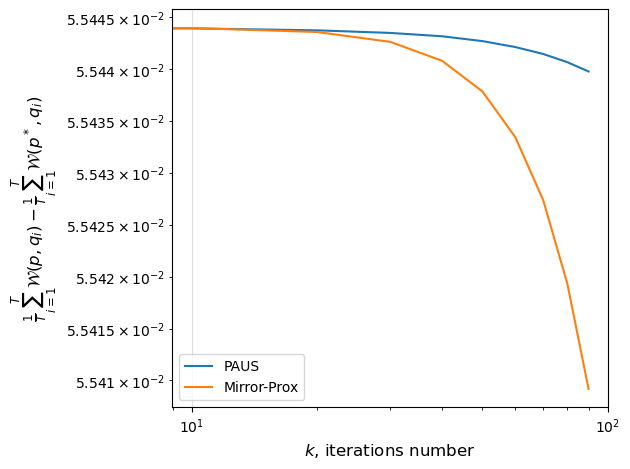

In [243]:
# for method_name in ["paus", "mirror-prox"]:
#     with open(f"reports/methods/{method_name}_history_d={d}_T={T}_n={n}_step_scale={step_scale}_max_iter={max_iter}.pkl", "rb") as f:
#         history = pickle.load(f)
#     plt.loglog(history["iter"], history["dual_gap"], label=method_name)
plt.loglog(history["iter"][:10], history["dual_gap"][:10], label='PAUS')
plt.loglog(mp_history["iter"][:10], mp_history["dual_gap"][:10], label='Mirror-Prox')
# plt.loglog(history["iter"], history["dual_gap"], label='PAUS')
# plt.loglog(mp_history["iter"], mp_history["dual_gap"], label='Mirror-Prox')
plt.ylabel(r'$\frac{1}{T}\sum_{i=1}^T\mathcal{W}(p,q_i) -\frac{1}{T}\sum_{i=1}^T\mathcal{W}(p^*,q_i)$', fontsize=12)

plt.xlabel('$k$, iterations number', fontsize=12)

plt.grid(alpha=0.4)
# plt.title(r"Entropy Regularized, $\dfrac{1}{\varepsilon}$="+str(int(1/eps)), fontsize=16)
# plt.title(r"Entropy Regularized, $\varepsilon$="+f"{eps:.5f}", fontsize=16)
plt.legend()
plt.tight_layout()

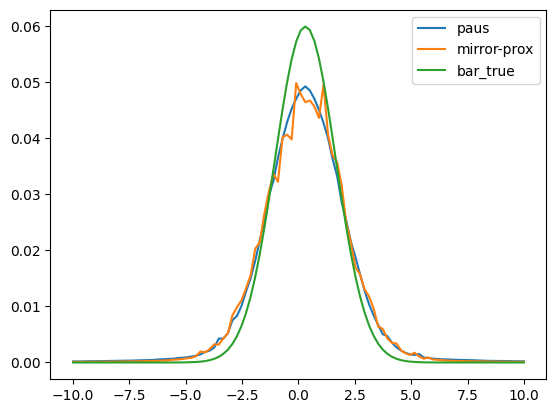

In [89]:
x = np.linspace(-10, 10, 100)
# for gamma_scale in [0.1, 0.01]:#, 10.0]:
#     with open(f"paus_gaussian_z_{gamma_scale}.pkl", "rb") as f:
#         z = pickle.load(f)
#         print(gamma_scale, z.p.sum())
#     plt.plot(x, z.p, label=f'{gamma_scale:.2f}')

# with open(f"paus_gaussian_z.pkl", "rb") as f:
#     z = pickle.load(f)
#     print(1, z.p.sum())
for method_name in ["paus", "mirror-prox"]:
    with open(f"reports/methods/{method_name}_p_star_d={d}_T={T}_n={n}_step_scale={step_scale}_max_iter={max_iter}.pkl", "rb") as f:
        p_star = pickle.load(f)
    plt.plot(x, p_star, label=method_name)

# with open(f"paus_gaussian_bartrue.pkl", "rb") as f:
#     p = pickle.load(f)
plt.plot(x, bar_true, label='bar_true')
plt.legend()